Available columns: ['rank', 'channel_info', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country']


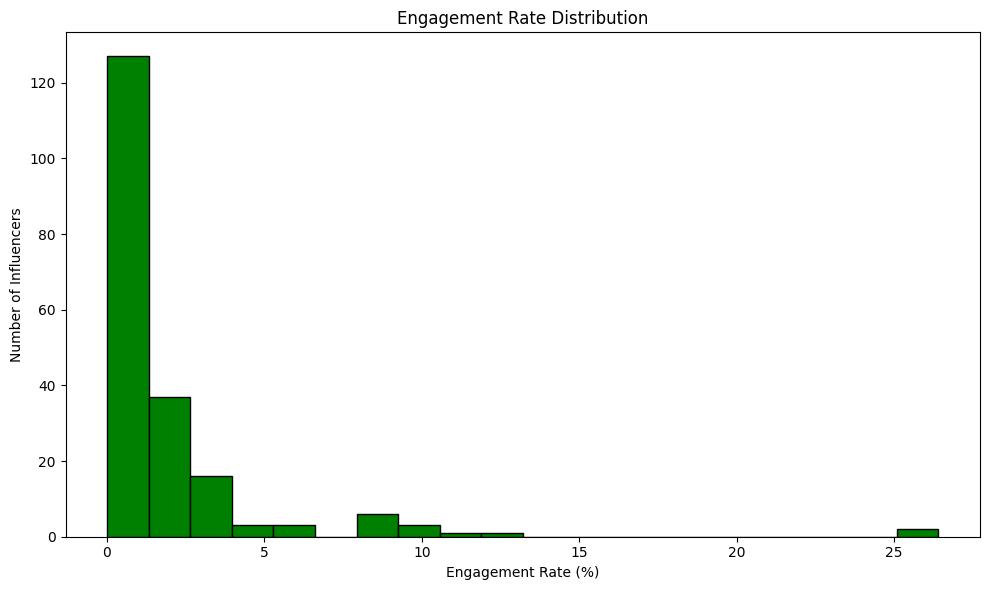

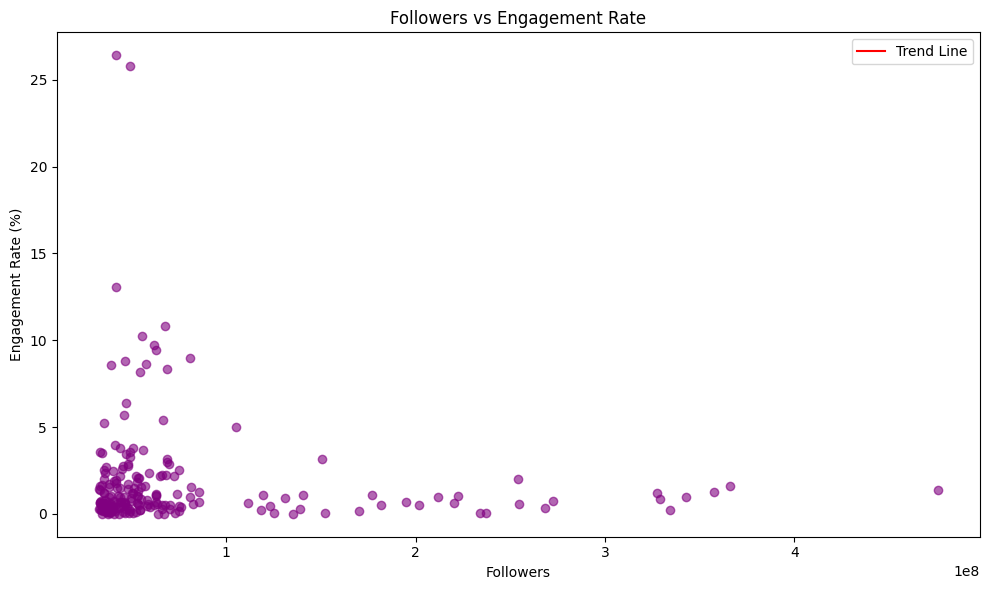

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/top_insta_influencers_data.csv')
df.columns = df.columns.str.strip()


def convert_followers(followers_str):
    if isinstance(followers_str, str):
        followers_str = followers_str.replace('m', 'e6').replace('k', 'e3')
        return pd.to_numeric(followers_str)
    return followers_str

df['followers'] = df['followers'].apply(convert_followers)

print("Available columns:", df.columns.tolist())

top10 = df.nlargest(10, 'followers')
plt.figure(figsize=(10, 6))
plt.bar(top10['channel_info'], top10['followers'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Instagram Influencers by Followers')
plt.ylabel('Followers')
plt.tight_layout()
plt.savefig("top10_followers_bar.png")
plt.show()

df['Engagement Rate'] = df['60_day_eng_rate'].str.rstrip('%').astype(float)
plt.figure(figsize=(10, 6))
plt.hist(df['Engagement Rate'], bins=20, color='green', edgecolor='black')
plt.title('Engagement Rate Distribution')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Number of Influencers')
plt.tight_layout()
plt.savefig("engagement_rate_histogram.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['followers'], df['Engagement Rate'], alpha=0.6, color='purple')
m, b = np.polyfit(df['followers'], df['Engagement Rate'], 1)
plt.plot(df['followers'], m * df['followers'] + b, color='red', label='Trend Line')
plt.title('Followers vs Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate (%)')
plt.legend()
plt.tight_layout()
plt.savefig("followers_vs_engagement_scatter.png")
plt.show()